### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 3

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Генералов Даниил
##### Группа:   НПИбд-01-21

## Москва 2024
***

### Вариант № 1

Annealing Data Set 

Название файла: anneal.data 

Ссылка: https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/ 

Первый признак: thick (столбец No 33) 

Второй признак: width (столбец No 34) 

Класс: classes (столбец No 39) 

Алгоритмы: K-means, Agglomerative Clustering, DBSCAN, Gaussian Mixture Model 

Меры качества: чистота (purity), парные меры TP, FN, FP, TN, индекс Фоулкса – Мэллоуса 

Найти лучший алгоритм кластеризации относительно меры качества: чистота (purity) 

# 1. открыть базу данных и прочитать значения

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
annealing = fetch_ucirepo(id=3) 

In [3]:
annealing['data'].keys()

dict_keys(['ids', 'features', 'targets', 'original', 'headers'])

In [4]:
import pandas as pd
df = pd.DataFrame(annealing['data']['targets'])
df['thick'] = annealing['data']['features']['thick']
df['width'] = annealing['data']['features']['width']
df

,class,thick,width
0,3,0.700,610.0
1,3,3.200,610.0
2,3,0.700,1300.0
3,3,2.801,385.1
4,3,0.801,255.0
...,...,...,...
893,2,1.599,610.0
894,2,1.601,830.0
895,2,1.599,150.0
896,U,0.400,20.0


# 2. починка пропусков

In [5]:
df['class'].notna().all()

np.True_

In [6]:
df['thick'].notna().all()

np.True_

In [7]:
df['width'].notna().all()

np.True_

Починка не требуется.

# 3. объединение классов

In [8]:
df['class'].unique()

array(['3', 'U', '1', '5', '2'], dtype=object)

Классов не больше 5, поэтому объединение не требуется.

# 4. визуализация

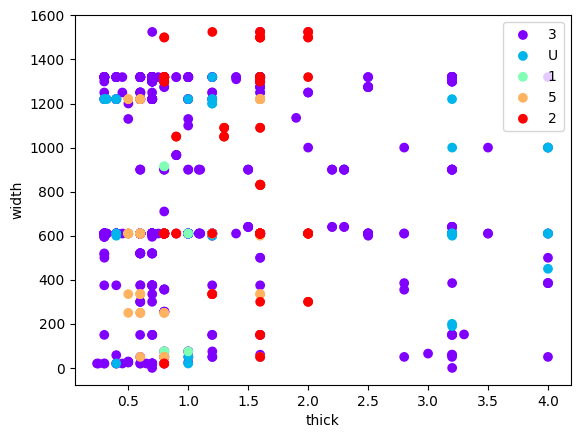

In [9]:
import matplotlib.pyplot as plt

klass = ['3', 'U', '1', '5', '2']

for k in klass:
    df_k = df[df['class'] == k]
    plt.scatter(df_k['thick'], df_k['width'], label=k, c=[klass.index(k) for i in range(len(df_k))], cmap='rainbow', vmin=0, vmax=4)

plt.xlabel('thick')
plt.ylabel('width')

plt.legend()
plt.show()

# 5. кластеризация

In [10]:
def draw_clusters(df, predicted_labels, title):
    # two panels, left with predicted data, right with correct and incorrect predictions in red and blue
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    all_thick = list(df['thick'])
    all_width = list(df['width'])
    all_class = list(df['class'])


    for k in range(5):
        thick = []
        width = []
        for i in range(len(df)):
            if all_class[i] == klass[k]:
                thick.append(all_thick[i])
                width.append(all_width[i])
        ax1.scatter(thick, width, label=klass[k], c=[k for i in range(len(thick))], cmap='rainbow', vmin=0, vmax=4)

    ax1.set_xlabel('thick')
    ax1.set_ylabel('width')

    ax1.legend()

    ax1.set_title(title)

    prediction_correct_thick = []
    prediction_correct_width = []
    prediction_incorrect_thick = []
    prediction_incorrect_width = []

    for i in range(len(df)):
        if all_class[i] == predicted_labels[i]:
            prediction_correct_thick.append(all_thick[i])
            prediction_correct_width.append(all_width[i])
        else:
            prediction_incorrect_thick.append(all_thick[i])
            prediction_incorrect_width.append(all_width[i])

    ax2.scatter(prediction_correct_thick, prediction_correct_width, label='OK', c='green')
    ax2.scatter(prediction_incorrect_thick, prediction_incorrect_width, label='NG', c='red')

    ax2.set_xlabel('thick')
    ax2.set_ylabel('width')

    ax2.legend()
    ax2.set_title(str(round((len(prediction_correct_thick) / len(all_thick)) * 100, 4)) + '% OK')

    plt.show()

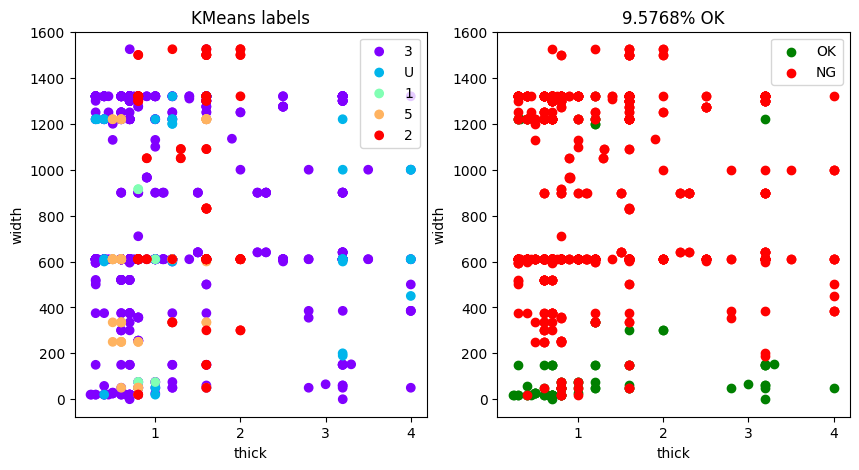

In [11]:
# K-means, Agglomerative Clustering, DBSCAN, Gaussian Mixture Model 

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

kmeans = KMeans(n_clusters=5)
kmeans_labels = kmeans.fit_predict(df[['thick', 'width']])
kmeans_labels = [klass[i] for i in kmeans_labels]
draw_clusters(df, kmeans_labels, "KMeans labels")

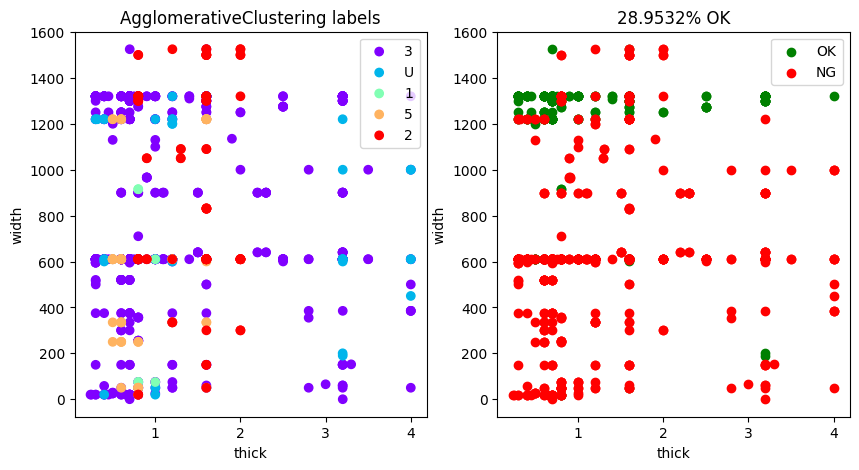

In [12]:
agglocluster = AgglomerativeClustering(n_clusters=5)
agglocluster_labels = agglocluster.fit_predict(df[['thick', 'width']])
agglocluster_labels = [klass[i] for i in agglocluster_labels]
draw_clusters(df, agglocluster_labels, "AgglomerativeClustering labels")

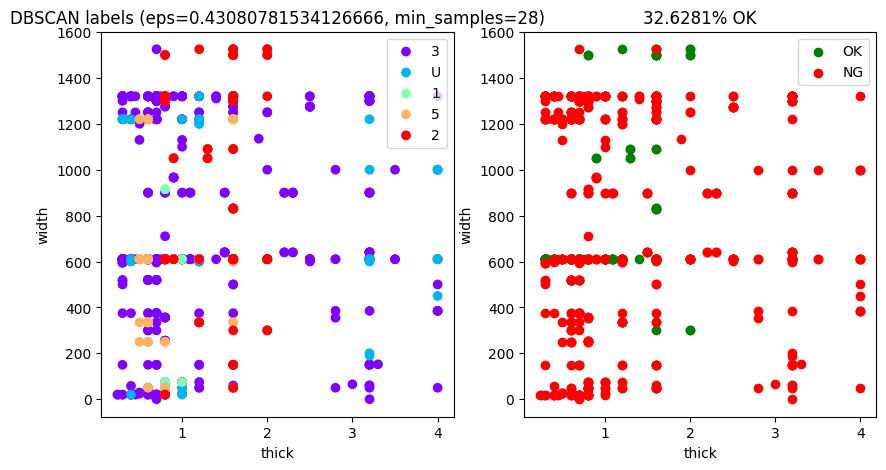

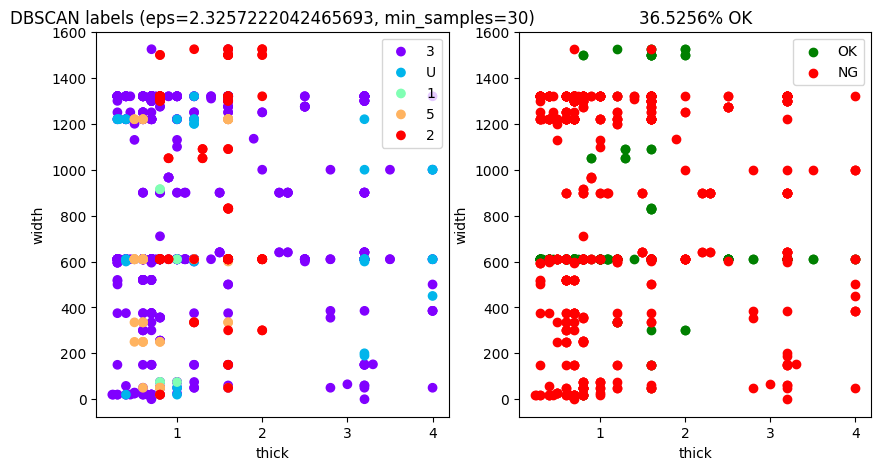

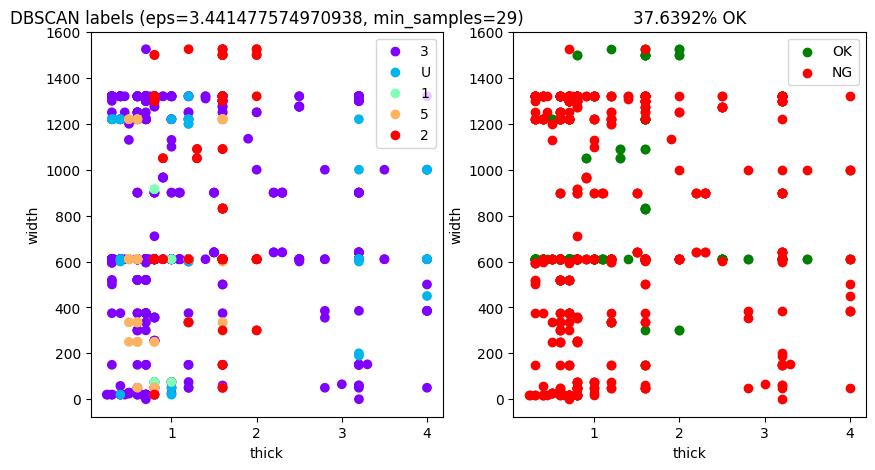

In [13]:
import random
for i in range(3):
    eps = 0.5
    min_samples = 5
    set_ok = False
    while not set_ok:
        eps = random.uniform(0.1, 5)
        min_samples = random.randint(2, 50)
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(df[['thick', 'width']])
        if len(set(dbscan_labels)) == 5:
            set_ok = True

    dbscan_labels = [klass[i] for i in dbscan_labels]
    draw_clusters(df, dbscan_labels, f"DBSCAN labels ({eps=}, {min_samples=})")

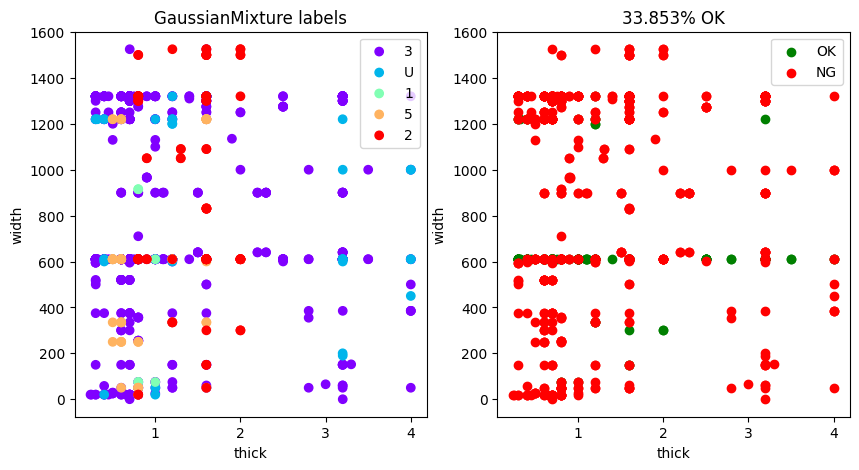

In [14]:
gaussmix = GaussianMixture(n_components=5)
gaussmix_labels = gaussmix.fit_predict(df[['thick', 'width']])
gaussmix_labels = [klass[i] for i in gaussmix_labels]
draw_clusters(df, gaussmix_labels, "GaussianMixture labels")

# 6. матрица сопряженности

Во всех таблицах, строчки -- это настоящие классы, а столбцы -- предсказания.

In [15]:
from sklearn.metrics.cluster import contingency_matrix

true_labels = [i for i in list(df['class'])]
kmeans_contingency = contingency_matrix(true_labels, kmeans_labels)
pd.DataFrame(kmeans_contingency).style.background_gradient(cmap='Blues')

,0,1,2,3,4
0,3,0,3,2,0
1,42,5,5,13,34
2,328,32,64,37,223
3,33,14,7,0,13
4,17,2,4,3,14


In [16]:
agglocluster_contingency = contingency_matrix(true_labels, agglocluster_labels)
pd.DataFrame(agglocluster_contingency).style.background_gradient(cmap='Blues')

,0,1,2,3,4
0,2,3,0,3,0
1,13,3,34,42,7
2,40,50,220,328,46
3,0,7,13,33,14
4,3,3,14,18,2


In [17]:
dbscan_contingency = contingency_matrix(true_labels, dbscan_labels)
pd.DataFrame(dbscan_contingency).style.background_gradient(cmap='Blues')

,0,1,2,3,4
0,0,5,3,0,0
1,15,37,42,0,5
2,140,204,288,27,25
3,0,22,32,13,0
4,3,14,14,9,0


In [18]:
gaussmix_contingency = contingency_matrix(true_labels, gaussmix_labels)
pd.DataFrame(gaussmix_contingency).style.background_gradient(cmap='Blues')

,0,1,2,3,4
0,3,0,3,2,0
1,3,7,42,11,36
2,43,101,280,36,224
3,7,15,32,0,13
4,3,6,14,3,14


In [19]:
import numpy as np
# https://stackoverflow.com/a/51672699
def purity_score(contingency_matrix):
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [20]:
print("KMeans purity: ", purity_score(kmeans_contingency))
print("AgglomerativeClustering purity: ", purity_score(agglocluster_contingency))
print("DBSCAN purity: ", purity_score(dbscan_contingency))
print("GaussianMixture purity: ", purity_score(gaussmix_contingency))

KMeans purity:  0.7616926503340757
AgglomerativeClustering purity:  0.7616926503340757
DBSCAN purity:  0.7616926503340757
GaussianMixture purity:  0.7616926503340757


In [21]:
# pairwise TN, FN, FP, TP
def pairwise_tf_fn(true_labels, test_labels):
    out = []
    for k in klass:
        tp = 0
        fp = 0
        fn = 0
        tn = 0
        for i in range(len(true_labels)):
            if true_labels[i] == k and test_labels[i] == k:
                tp += 1
            elif true_labels[i] != k and test_labels[i] == k:
                fp += 1
            elif true_labels[i] == k and test_labels[i] != k:
                fn += 1
            else:
                tn += 1
        out.append([tp, fp, fn, tn])
    return np.array(out).sum(axis=0)

In [22]:
import math
def fowkes_mallows(tp, fp, fn):
    return math.sqrt( (tp / (tp+fp)) * (tp / (tp + fn)) )

In [23]:
tp,fp,fn,tn = pairwise_tf_fn(true_labels, kmeans_labels)
print("Fowkes-Mallows KMeans:", fowkes_mallows(tp,fp,fn))
tp,fp,fn,tn = pairwise_tf_fn(true_labels, agglocluster_labels)
print("Fowkes-Mallows AgglomerativeClustering:", fowkes_mallows(tp,fp,fn))
tp,fp,fn,tn = pairwise_tf_fn(true_labels, dbscan_labels)
print("Fowkes-Mallows DBSCAN:", fowkes_mallows(tp,fp,fn))
tp,fp,fn,tn = pairwise_tf_fn(true_labels, gaussmix_labels)
print("Fowkes-Mallows GaussianMixture:", fowkes_mallows(tp,fp,fn))

Fowkes-Mallows KMeans: 0.0957683741648107
Fowkes-Mallows AgglomerativeClustering: 0.289532293986637
Fowkes-Mallows DBSCAN: 0.37639198218262804
Fowkes-Mallows GaussianMixture: 0.33853006681514475


# 7. лучший алгоритм

In [24]:
purity_scores = [
    ("KMeans", purity_score(kmeans_contingency)),
    ("AgglomerativeClustering", purity_score(agglocluster_contingency)),
    ("DBSCAN", purity_score(dbscan_contingency)),
    ("GaussianMixture", purity_score(gaussmix_contingency)),
]

purity_scores.sort(key=lambda x: x[1], reverse=True)
print("Best:")
for i, score in enumerate(purity_scores):
    print(f"{i+1}. {score[0]}:\t\t{score[1]}")

Best:
1. KMeans:		0.7616926503340757
2. AgglomerativeClustering:		0.7616926503340757
3. DBSCAN:		0.7616926503340757
4. GaussianMixture:		0.7616926503340757


# 8. области принятия решений

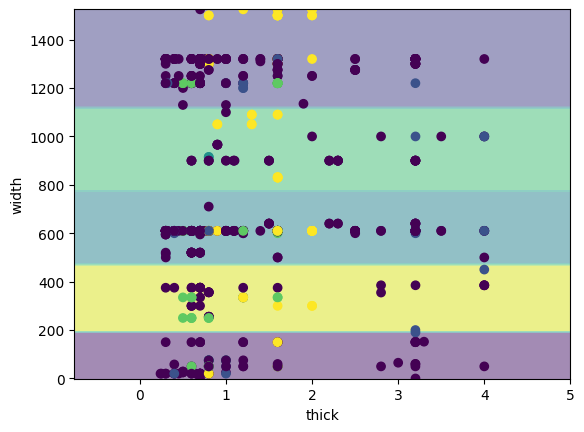

In [29]:
# decision boundary plot for KMeans

from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(kmeans, df[['thick', 'width']], response_method="predict", cmap='viridis', alpha=0.5)
disp.ax_.scatter(df['thick'], df['width'], c=[klass.index(k) for k in df['class']], cmap='viridis')
plt.show()